This notebook will show the growth of three portfolios using different weightings for TSX60 companies

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

In [3]:
# 60 tickers within the TSX60
# holdings taken from XIU.TO ETF
# USD and CAD cash holdings removed
# Excel was used to convert dots to dashes, add .TO to the end of ticker, and quotation marks to convert each ticker to a string

tickers = ['RY.TO',
'TD.TO',
'SHOP.TO',
'BNS.TO',
'ENB.TO',
'BAM-A.TO',
'BMO.TO',
'CNR.TO',
'CP.TO',
'CNQ.TO',
'CM.TO',
'TRP.TO',
'BCE.TO',
'SU.TO',
'NTR.TO',
'MFC.TO',
'ABX.TO',
'ATD.TO',
'T.TO',
'CSU.TO',
'SLF.TO',
'WCN.TO',
'FNV.TO',
'NA.TO',
'AEM.TO',
'MG.TO',
'FTS.TO',
'CVE.TO',
'WPM.TO',
'POW.TO',
'GIB-A.TO',
'PPL.TO',
'RCI-B.TO',
'BIP-UN.TO',
'QSR.TO',
'TRI.TO',
'TECK-B.TO',
'FM.TO',
'DOL.TO',
'SJR-B.TO',
'L.TO',
'MRU.TO',
'OTEX.TO',
'EMA.TO',
'IMO.TO',
'AQN.TO',
'CCO.TO',
'CTC-A.TO',
'CAE.TO',
'WN.TO',
'H.TO',
'CAR-UN.TO',
'GIL.TO',
'CCL-B.TO',
'K.TO',
'BHC.TO',
'FSV.TO',
'SAP.TO',
'SNC.TO',
'WEED.TO']

In [4]:
# use YahoYahooFinancials to get market cap for each security

# create array to store market caps of each ticker
m_caps = np.array([YahooFinancials(ticker).get_market_cap() for ticker in tickers])

In [5]:
# create three portfolios, each of which have different weightings using the same securities 

# equal weight portfolio weights
eq_weight = np.repeat(1/len(tickers), len(tickers))

# cap weight portfolio weights
cap_weight = m_caps/np.sum(m_caps)

# inverse cap weight portfolio weights
# take the inverse of every weight in m_caps
inv_values = m_caps.astype(float)**-1
# calculate inverse portfolio weights
inv_weight = inv_values/np.sum(inv_values)

In [6]:
# check sum of weights
np.sum(eq_weight), np.sum(eq_weight), np.sum(inv_weight)

(1.0, 1.0, 1.0000000000000002)

In [26]:
# get price data for selected tickers using yfinance
data = yf.download(tickers,
                   start=dt.datetime(2020,1,1),
                   end=dt.date.today(),
                   group_by='tickers')

# convert into easily readable dataframe
# sort into dataframe
df_prices = pd.DataFrame({ticker: data[ticker]['Adj Close'] for ticker in tickers})

# calculate daily returns
df_returns = df_prices.pct_change().dropna()

# take dot product of daily returns and different portfolio weights to find weights of each of the three portfolios
for column_name, weight in list(zip(['Equal Weight', 'Cap Weight', 'Inverse Cap Weight'], [eq_weight, cap_weight, inv_weight])):
    df_returns[column_name] = df_returns.iloc[:, 0:60].dot(weight)

# find cumulative growth for each of the three portfolios
df_cumulative_growth = (((1 + df_returns.iloc[:, -3:]).cumprod() -1)) * 100

[*********************100%***********************]  60 of 60 completed


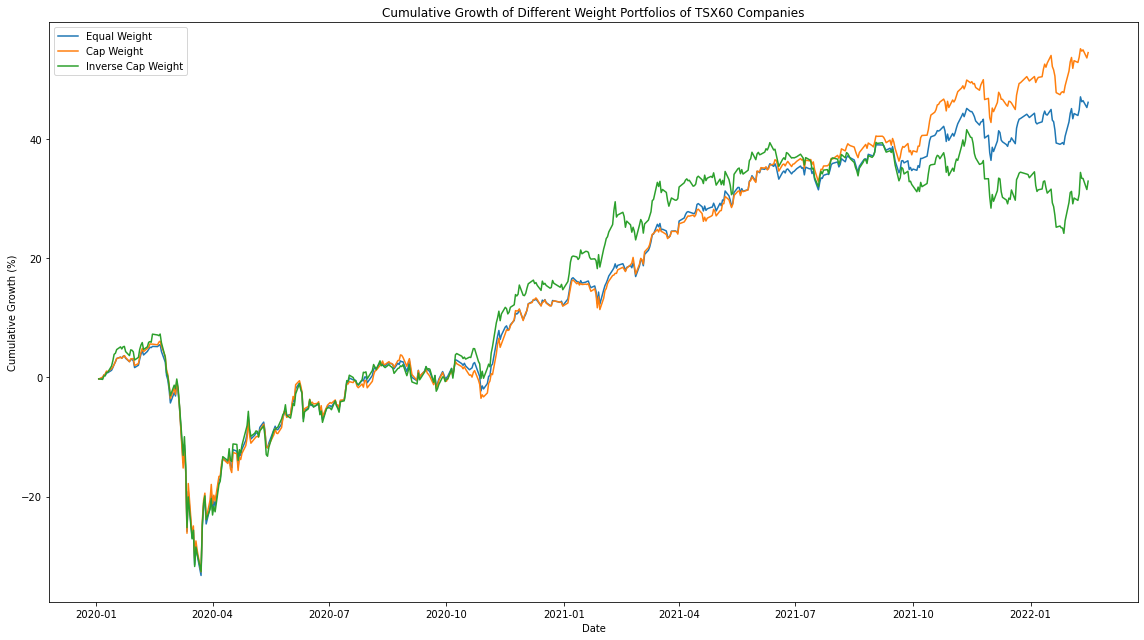

In [28]:
fig, ax = plt.subplots(figsize = (16, 9))

for i in df_cumulative_growth.columns:
    ax.plot(df_cumulative_growth.index, df_cumulative_growth.loc[:, i], label=str(i))

ax.set_title('Cumulative Growth of Different Weight Portfolios of TSX60 Companies')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Growth (%)')

ax.legend()

fig.tight_layout()
plt.show()

Summary
* All portfolios moved similarly until about 2020-11, after which the Inverse Cap Weight Portfolio began to outpace the other portfolios. The Inverse Cap Weight Portfolio stagnated and the other two portfolio grew at a similar pace starting about 2021-07 until about 2021-09. At that point the Cap Weight Portfolio had the consistently higher growth until the end of the period; Equal Weight Portfolio was second, and Inverse Cap Weight Portfolio was last. At the end, Cap Weight Portfolio grew about twice as much as the Inverse Cap Weight.

* These portfolios show how different weightings using the same securities can produce different returns over a period of time.

* The post-COVID recovery can be attributed to the stellar growth of the Inverse Cap Weight Portfolio because the market appeared overvalued and the overall demand for securities lifted smaller cap companies, which had more "room to grow". Once an inflationary environment was evident (starting late 2021), the smaller cap companies may have suffered because of the sensitity to local economies. Moreover, these smaller cap companies may not have held their higher valuations over time. 

* Different weightings of the same securities can be used as a strategy to adapt to different market environments. Next steps include defining different market environments, and knowing when to switch weightings to preserve and grow capital.